# UD2.2 Problem 1

### Student: Fernando Soto

Using the IBMQ with 127 qubits construct the following states

* Bell
* 2H
* 3H
* GHZ
* Toffoli

and compare with the results presented in the slides

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from collections import Counter

API_KEY = "[YOUR_API_KEY]"

def display_job_result(job_result):
    # Extract the samples
    samples = job_result['results'][0]['data']['c']['samples']
    num_bits = job_result['results'][0]['data']['c']['num_bits']
    # Count occurrences
    counts = Counter(samples)
    # Convert hex strings to bitstrings and normalize to probabilities
    total_shots = sum(counts.values())
    probabilities = {}
    for hex_val, freq in counts.items():
        bitstring = format(int(hex_val, 16), f'0{num_bits}b')
        probabilities[bitstring] = freq / total_shots
    # Plot
    fig = plot_histogram(probabilities)
    return fig


## Bell state

Bell entangled quantum state. When input is $\ket{00}$ the ouput is:

$\renewcommand{\ket}[1]{\left| #1 \right\rangle}$

$$\ket{\phi⁺}=\frac{\ket{00}+\ket{11}}{\sqrt{2}}$$

Created a Bell state circuit in IBM composer and exported to qiskit format for displaying locally:

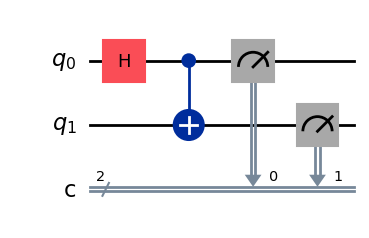

In [3]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from numpy import pi

qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.draw("mpl")

Then executed on an available device named 'ibm_fez' with 156 qubits and obtained similar probability distribution.

qiskit_runtime_service._discover_account:WARNING:2025-12-08 12:47:06,642: Loading account with the given token. A saved account will not be used.


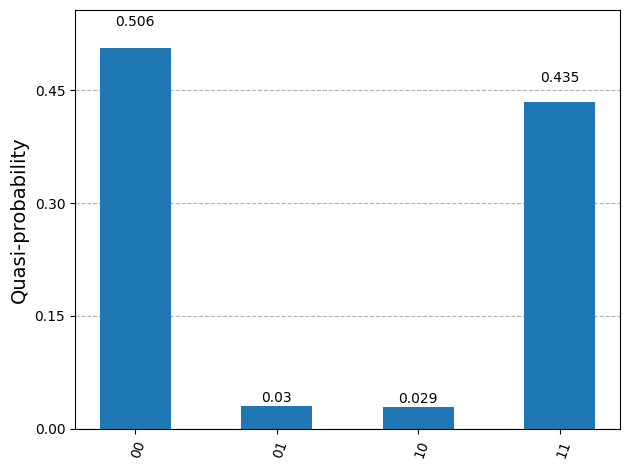

In [8]:
# Get job results from IBM Quantum platform
service = QiskitRuntimeService(
    channel='ibm_quantum_platform',
    instance='crn:v1:bluemix:public:quantum-computing:us-east:a/e37b870a3a92417eb2e03e10c1326b8c:f0946229-5fda-4879-949e-af5843fdd081::',
    token=API_KEY
)
job = service.job('d4r221s5fjns73d0uc90')
job_result = job.result()
display_job_result(job_result)


## 2H

A quantum 2H circuit generates a equal superposition of all 4 possible states from an input state $\ket{00}$.

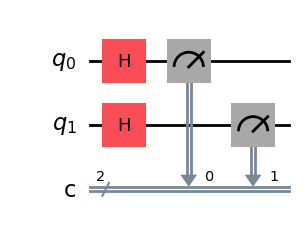

In [14]:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.draw("mpl")

Executed using 'ibm_torino' with 133 qubits

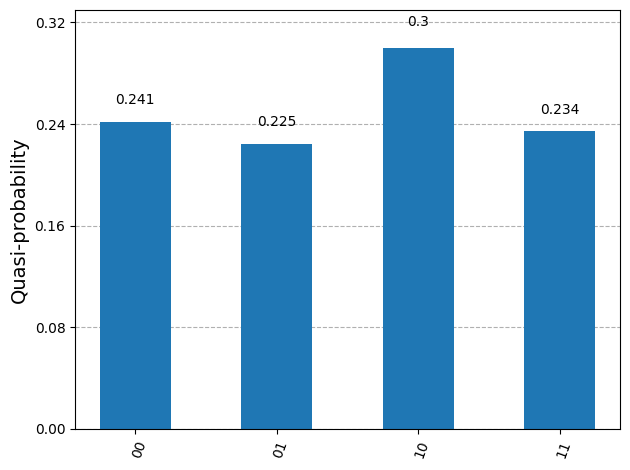

In [13]:
job = service.job('d4rbri4fitbs739hqhfg')
job_result = job.result()
display_job_result(job_result)

## 3H

A quantum 3H circuit generates a equal superposition of all 8 possible states from an input state $\ket{000}$.

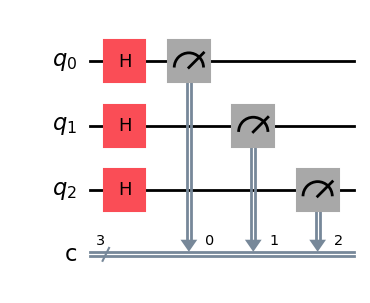

In [16]:
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[2], creg_c[2])
circuit.draw("mpl")

Executed using 'ibm_torino' with 133 qubits

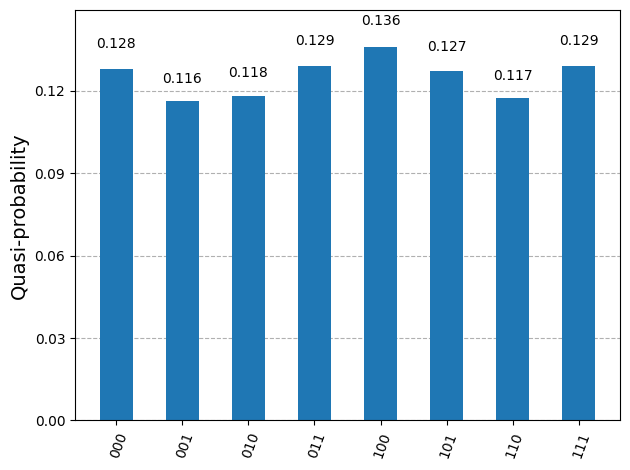

In [18]:
job = service.job('d4rbu7s5fjns73d18g6g')
display_job_result(job.result())

### GHZ

Greenberger–Horne–Zeilinger (GHZ) entangled quantum state

$$\ket{GHZ}=\frac{\ket{000}+\ket{111}}{\sqrt{2}}$$

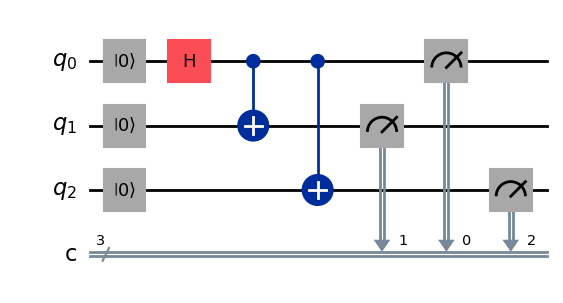

In [19]:
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.reset(qreg_q[0])
circuit.reset(qreg_q[1])
circuit.reset(qreg_q[2])
circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[2], creg_c[2])
circuit.draw("mpl")

Executed using 'ibm_torino' with 133 qubits

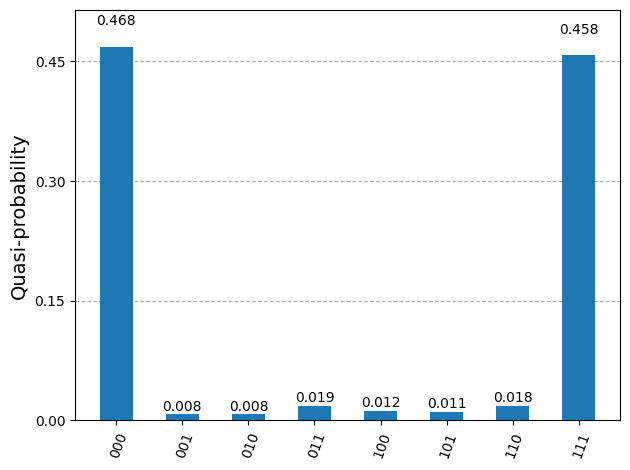

In [21]:
job = service.job('d4rc6u7t3pms73982tgg')
display_job_result(job.result())

## Toffoli

The proposed circuit is a Toffoli gate with the control inputs and outputs negated. HZH is equivalent to a Pauli X operator with acts as a quantum NOT. Without explicit values at the inputs $q_0$, $q_1$ and $q_2$ they are assumed $\ket{0}$. So the input to the circuit is $\ket{000}$, the input to the Toffoli gate is $\ket{011}$. The output to the Toffoli gate is then $\ket{111}$ and the output of the circuit is $\ket{100}$.

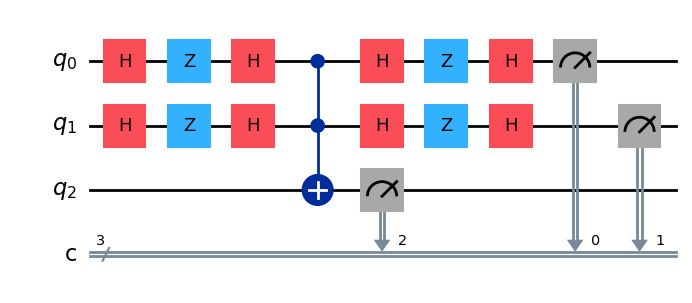

In [22]:
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.z(qreg_q[0])
circuit.z(qreg_q[1])
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.ccx(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.z(qreg_q[0])
circuit.z(qreg_q[1])
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[2], creg_c[2])
circuit.draw("mpl")

Executed using 'ibm_torino' with 133 qubits

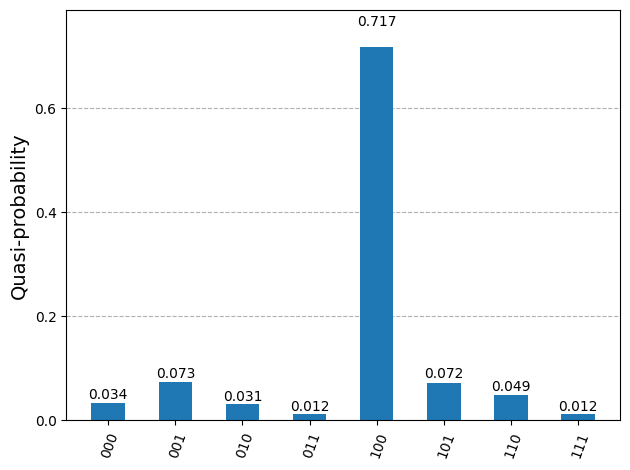

In [23]:
job = service.job('d4rca8nt3pms739830i0')
display_job_result(job.result())